In [1]:
# %pip install pyreadr
# %pip install catboost
# %pip install lckr-jupyterlab-variableinspector


In [2]:
import sklearn 
import os, sys
import pyreadr
import pandas as pd
import catboost
from IPython.display import clear_output


In [3]:
work_dir = '/home/idies/workspace/Storage/hnguye78/persistent/cv_surgery'
exec(open(work_dir+'/code/Python/snippets/helpful_functions.py').read())


In [4]:
import multiprocessing as mp
mp.cpu_count()

20

In [5]:
outcome = 'cnstrokp'

In [6]:
load_dir = work_dir+'/csv_files/pre_anat_intra'
feature_space = pd.read_csv(load_dir+'/feature_space_preop_anat_intra_w_interaction_terms.csv') 

In [7]:
feature_space = feature_space.rename(columns={"feature_space.concatid": "concatid"}).drop(['Unnamed: 0'], axis =1)
feature_space.head()

,concatid,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,10020V313492,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,10022V3117559,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,10022V315180,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,10031V313571,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,10047V3420470,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4


In [8]:
#label_space = pd.read_csv(smb2.open('//'+work_dir+'/label_space_sts.csv'))
label_space = pd.read_csv(load_dir+'/label_space.csv')

In [9]:
label_space_no_na = label_space.fillna(2)

In [10]:
label_df = label_space_no_na[['concatid', outcome]].drop_duplicates(subset='concatid', keep="last")

In [11]:
label_df.head()

,concatid,cnstrokp
0,10020V313492,2.0
1,10022V3117559,2.0
2,10022V315180,2.0
3,10031V313571,2.0
4,10047V3420470,2.0


In [12]:
data = pd.merge(label_df, feature_space.drop_duplicates(subset='concatid', keep="last")
                , how='left', on='concatid', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [13]:
data_full = data
data = data_full.drop(['concatid'], axis = 1)

In [14]:
data

,cnstrokp,proctype,gender,ethnicity,raceasian,raceblack,racecaucasian,raceother,age,heightcm,...,nc_stern.cplegia_ant,nc_stern.cplegia_ret,nc_stern.frepl,nc_stern.inc_revasc,cplegia_ant.cplegia_ret,cplegia_ant.frepl,cplegia_ant.inc_revasc,cplegia_ret.frepl,cplegia_ret.inc_revasc,frepl.inc_revasc
0,2.0,2,2,2,2,2,1,2,54.0,155.0,...,2,2,4,4,1,2,2,2,2,4
1,2.0,2,1,2,2,2,1,2,74.0,174.0,...,2,4,4,4,2,2,2,4,4,4
2,2.0,6,2,2,2,2,1,2,66.0,157.0,...,2,2,4,2,1,2,1,2,1,2
3,2.0,1,2,2,2,2,1,2,79.0,155.5,...,2,2,4,4,1,2,2,2,2,4
4,2.0,1,1,2,2,2,1,2,61.0,170.0,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34556,2.0,7,1,2,2,2,1,2,81.0,178.1,...,2,4,4,4,2,2,2,4,4,4
34557,2.0,2,1,2,2,2,1,2,66.0,191.0,...,2,4,4,4,2,2,2,4,4,4
34558,2.0,2,1,2,2,2,1,2,82.0,188.0,...,4,4,4,4,4,4,4,4,4,4
34559,2.0,2,1,2,2,2,1,2,55.0,185.0,...,2,4,4,4,2,2,2,4,4,4


In [15]:
data_full.shape

(34561, 15756)

In [16]:
name_list = list(feature_space)


In [17]:
data.rename(columns={outcome: 'label'}, inplace=True)

In [18]:
# change label: 2 (alive) to 0 (class 0)
data.loc[data.label ==2, 'label'] = 0

In [19]:
data['label'].value_counts()


0.0    34004
1.0      557
Name: label, dtype: int64

In [20]:
# Split train set/test set in stratified fashion, then downsample training set to balance outcome class:
from sklearn import model_selection
outercv = sklearn.model_selection.StratifiedKFold(n_splits=10,shuffle=True,random_state= 1)
X = data.drop(['label'],axis =1).values
y = data[['label']].values

for train_index, test_index in outercv.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

train_df = data.iloc[train_index]
test_df = data.iloc[test_index]
train_df_majority = train_df[train_df['label']==0]
train_df_minority = train_df[train_df['label']==1]

# Downsampling:
from sklearn.utils import resample
train_df_majority_downsampled = resample(train_df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=2*train_df_minority.shape[0],    # to match minority class
                                 random_state=1)

df_downsampled = pd.concat([train_df_majority_downsampled, train_df_minority])

In [21]:
# y_test: 1 = dead, 2 = live. Convert live to class 0:

import numpy as np
np.array(np.unique(y_test, return_counts=True)).T
y_test[y_test == 2] = 0
y_train[y_train == 2] = 0
np.array(np.unique(y_test, return_counts=True)).T


array([[0.0e+00, 3.4e+03],
       [1.0e+00, 5.6e+01]])

In [22]:
# Split the training set further to cv_train-validation set, using stratified k-fold cv: 10-fold x 5 times
# train and calibrate models
from sklearn import model_selection
outercv = sklearn.model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats = 2,random_state= 1)

# initialize:
cv_performance_df = pd.DataFrame()
cv_performance_isotonic_df = pd.DataFrame()
cv_performance_sigmoid_df = pd.DataFrame()
training_bs_testset_pred_df = data_full[['concatid',outcome]].loc[test_index,:].rename(columns={outcome: 'label'})
training_bs_testset_pred_calibrated_isotonic_df = training_bs_testset_pred_df.copy(deep = True)
training_bs_testset_pred_calibrated_sigmoid_df = training_bs_testset_pred_df.copy(deep = True)

fold = 1
for cv_train_index, cv_test_index in outercv.split(X_train, y_train):
    print("Fold "+ str(fold) + "....")
    fold = fold + 1
    
    # print("TRAIN:", train_index, "TEST:", test_index)
    cv_X_train, cv_X_test = X_train[cv_train_index], X_train[cv_test_index]
    cv_y_train, cv_y_test = y_train[cv_train_index], y_train[cv_test_index]
    
    cv_train_df = data.iloc[cv_train_index]
    cv_test_df = data.iloc[cv_test_index]
    cv_train_df_majority = cv_train_df[cv_train_df['label']==0]
    cv_train_df_minority = cv_train_df[cv_train_df['label']==1]

    # Downsampling:
    from sklearn.utils import resample
    cv_train_df_majority_downsampled = resample(cv_train_df_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=2*cv_train_df_minority.shape[0],    # to match minority class
                                     random_state=1)

    # Combine downsampled majority class with minority class
    cv_df_downsampled = pd.concat([cv_train_df_majority_downsampled, cv_train_df_minority])
    cv_X_train_downsampled = cv_df_downsampled.drop(['label'],axis =1)
    cv_y_train_downsampled = cv_df_downsampled['label'].ravel()
    
    
    # Train model:
    from catboost import CatBoostClassifier
    cv_cb_downsampled =  CatBoostClassifier(random_state = 1)
    cv_cb_downsampled.fit(cv_X_train_downsampled, cv_y_train_downsampled, verbose = False)
    clear_output()


    
    # Evaluate model on cv_test_set (validation set):
    cv_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(cv_X_test)[:, 1]
    performance_metrics = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled, thres = 0.5)
    cv_performance_df = cv_performance_df.append(performance_metrics, ignore_index=True)
    
    
    # Pred prob of model on holdout testset:
    training_bs_testset_pred_df['time_'+str(fold-1)] = cv_cb_downsampled.predict_proba(X_test)[:, 1]
    
    
    
    
    # calibrate model, record performance metric validation set, and pred prob on holdout testset:
    cv_cb_downsampled_isotonic_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'isotonic')
    clear_output()
    training_bs_testset_pred_calibrated_isotonic_df['time_'+str(fold-1)] = cv_cb_downsampled_isotonic_on_cv.predict_proba(X_test)[:, 1]

    cv_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(cv_X_test)[:, 1]
    clear_output()
    performance_metrics_isotonic = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    cv_performance_isotonic_df = cv_performance_isotonic_df.append(performance_metrics_isotonic, ignore_index=True)

    
    cv_cb_downsampled_sigmoid_on_cv = calibrate_model(cv_cb_downsampled, cv_X_train, cv_y_train.ravel(), method = 'sigmoid')
    clear_output()

    training_bs_testset_pred_calibrated_sigmoid_df['time_'+str(fold-1)] = cv_cb_downsampled_sigmoid_on_cv.predict_proba(X_test)[:, 1]
    
    cv_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(cv_X_test)[:, 1]
    performance_metrics_sigmoid = performance_wo_figure(cv_y_test, cv_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    cv_performance_sigmoid_df = cv_performance_sigmoid_df.append(performance_metrics_sigmoid, ignore_index=True)
    
    clear_output()


In [23]:
training_bs_testset_pred_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_isotonic_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)
training_bs_testset_pred_calibrated_sigmoid_df.to_csv(load_dir+'/'+'patient_specific_pred_prob_testset_sigmoid_on_cv_' + outcome +'.csv', index=False)


In [24]:
cv_performance_df.to_csv(load_dir+'/'+'cv_performance_df_' + outcome +'.csv', index=False)
cv_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)


,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.328,0.909,0.091,0.216,0.907,0.126,0.789,0.789,0.909
std,0.083,0.015,0.003,0.022,0.011,0.015,0.044,0.044,0.011
min,0.217,0.889,0.086,0.183,0.888,0.104,0.730,0.730,0.890
2.5%,0.222,0.891,0.086,0.187,0.890,0.106,0.733,0.733,0.892
50%,0.326,0.905,0.091,0.214,0.905,0.125,0.785,0.785,0.907
97.5%,0.454,0.939,0.096,0.256,0.925,0.153,0.858,0.858,0.927
max,0.463,0.942,0.096,0.263,0.926,0.157,0.860,0.860,0.928


In [25]:
# print out performance:
print_cv_performance = pd.DataFrame(cv_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()

print_cv_performance.to_csv(load_dir+'/'+'print_cv_performance_' + outcome +'.csv', index=False)
print_cv_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.905 (0.891, 0.939)","0.905 (0.89, 0.925)","0.326 (0.222, 0.454)","0.091 (0.086, 0.096)","0.214 (0.187, 0.256)","0.125 (0.106, 0.153)","0.785 (0.733, 0.858)","0.785 (0.733, 0.858)","0.907 (0.892, 0.927)"


In [26]:
cv_performance_isotonic_df.to_csv(load_dir+'/'+'cv_performance_isotonic_df_' + outcome +'.csv', index=False)
print_cv_performance_isotonic = pd.DataFrame(cv_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_isotonic.to_csv(load_dir+'/'+'print_cv_performance_isotonic_' + outcome +'.csv', index=False)
print_cv_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.71 (0.696, 0.767)","0.984 (0.984, 0.984)","0.05 (0.041, 0.065)","0.016 (0.015, 0.016)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","1.0 (1.0, 1.0)"


In [27]:
cv_performance_sigmoid_df.to_csv(load_dir+'/'+'cv_performance_sigmoid_df_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid = pd.DataFrame(cv_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_cv_performance_sigmoid.to_csv(load_dir+'/'+'print_cv_performance_sigmoid_' + outcome +'.csv', index=False)
print_cv_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.717 (0.7, 0.769)","0.984 (0.984, 0.984)","0.05 (0.043, 0.067)","0.016 (0.016, 0.016)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","1.0 (1.0, 1.0)"


In [28]:
# Save models:
import pickle
pickle.dump(cv_cb_downsampled, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled.sav', 'wb'))
pickle.dump(cv_cb_downsampled_isotonic_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))
pickle.dump(cv_cb_downsampled_sigmoid_on_cv, open(work_dir+'/models/pre_anat_intra/'+'model_' +outcome + '_cv_cb_downsampled_isotonic_calibration_on_cv.sav', 'wb'))


In [29]:
# Variable Importance:

feature_imp_df = cv_cb_downsampled.get_feature_importance(prettified = True)
feature_imp_df_sort = feature_imp_df.sort_values(by='Importances', ascending=False, inplace=False, kind='quicksort', na_position='last')
feature_imp_df_sort.to_csv(load_dir+'/'+'feature_imp_df_sort_'+outcome+'.csv', index=False)

decouple_var_imp_sort = decouple_var_imp(feature_imp_df_sort)
decouple_var_imp_sort.to_csv(load_dir+'/'+'decouple_var_imp_sort_'+outcome+'.csv', index=False)
decouple_var_imp_sort.iloc[:10,:]

/home/idies/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Feature Id,total_importance,min_max_scale_importance
0,age,5.574022,1.000000
2,wbc,5.252116,0.942125
21,highintraglu,4.752648,0.852325
8,lwsthct,4.605395,0.825851
18,lwstintrahemo,4.551415,0.816146
4,a1clvl,4.070313,0.729648
3,totalbumin,3.649733,0.654032
5,hct,3.577865,0.641111
23,ppef,3.568559,0.639438
17,platelets,3.422989,0.613266


In [30]:
# Bootstrap testset:
bs_testset_performance_df = pd.DataFrame()
bs_testset_performance_isotonic_df = pd.DataFrame()
bs_testset_performance_sigmoid_df = pd.DataFrame()
for i in range(100):
    sample_indices = np.random.randint(len(X_test), size=len(X_test))
    bs_y_test = y_test[sample_indices]
    bs_X_test = X_test[sample_indices,:]
    
    bs_y_test_predict_proba_cb_downsampled = cv_cb_downsampled.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)
    bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)

    
    bs_y_test_predict_proba_cb_downsampled_isotonic = cv_cb_downsampled_isotonic_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_isotonic = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_isotonic, thres = 0.5)
    bs_testset_performance_isotonic_df = bs_testset_performance_isotonic_df.append(bs_performance_metrics_isotonic, ignore_index=True)
    
    bs_y_test_predict_proba_cb_downsampled_sigmoid = cv_cb_downsampled_sigmoid_on_cv.predict_proba(bs_X_test)[:, 1]
    bs_performance_metrics_sigmoid = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_sigmoid, thres = 0.5)
    bs_testset_performance_sigmoid_df = bs_testset_performance_sigmoid_df.append(bs_performance_metrics_sigmoid, ignore_index=True)

/home/idies/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/idies/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/idies/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/idies/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: Un

In [31]:
bs_testset_performance_df.to_csv(load_dir+'/'+'bs_testset_performance_df_' + outcome +'.csv', index=False)
bs_testset_performance_isotonic_df.to_csv(load_dir+'/'+'bs_testset_performance_isotonic_df_' + outcome +'.csv', index=False)
bs_testset_performance_sigmoid_df.to_csv(load_dir+'/'+'bs_testset_performance_sigmoid_df_' + outcome +'.csv', index=False)

In [32]:
bs_testset_performance_df.describe(percentiles = [.025, .5, .975]).round(decimals = 3)

,ARC,AUROC,Brier,F1,accuracy,precision,recall,sens,spec
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.340,0.941,0.086,0.260,0.920,0.153,0.876,0.876,0.921
std,0.066,0.020,0.002,0.033,0.005,0.023,0.045,0.045,0.005
min,0.131,0.890,0.081,0.152,0.910,0.085,0.730,0.730,0.910
2.5%,0.225,0.899,0.082,0.199,0.911,0.113,0.784,0.784,0.912
50%,0.337,0.940,0.086,0.259,0.919,0.153,0.875,0.875,0.920
97.5%,0.478,0.978,0.090,0.334,0.930,0.204,0.956,0.956,0.930
max,0.523,0.982,0.091,0.355,0.932,0.220,0.979,0.979,0.933


In [33]:
# print out performance:
print_bs_testset_performance = pd.DataFrame(bs_testset_performance_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance.to_csv(load_dir+'/'+'print_bs_testset_performance_' + outcome +'.csv', index=False)
print_bs_testset_performance

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.94 (0.899, 0.978)","0.919 (0.911, 0.93)","0.337 (0.225, 0.478)","0.086 (0.082, 0.09)","0.259 (0.199, 0.334)","0.153 (0.113, 0.204)","0.875 (0.784, 0.956)","0.875 (0.784, 0.956)","0.92 (0.912, 0.93)"


In [34]:
# print out performance:
print_bs_testset_performance_isotonic = pd.DataFrame(bs_testset_performance_isotonic_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_isotonic.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_isotonic

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.743 (0.67, 0.802)","0.984 (0.98, 0.988)","0.062 (0.033, 0.125)","0.016 (0.011, 0.019)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","1.0 (1.0, 1.0)"


In [35]:
# print out performance:
print_bs_testset_performance_sigmoid = pd.DataFrame(bs_testset_performance_sigmoid_df[['AUROC', 'accuracy', 'ARC', 'Brier', 'F1','precision','recall', 'sens', 'spec']].apply(lambda x: report_metric(x), axis = 0)).transpose()
print_bs_testset_performance_sigmoid.to_csv(load_dir+'/'+'print_bs_testset_performance_isotonic_' + outcome +'.csv', index=False)
print_bs_testset_performance_sigmoid

,AUROC,accuracy,ARC,Brier,F1,precision,recall,sens,spec
0,"0.754 (0.688, 0.81)","0.984 (0.98, 0.988)","0.064 (0.034, 0.127)","0.016 (0.012, 0.019)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","0.0 (0.0, 0.0)","1.0 (1.0, 1.0)"


	Brier: 0.087
	AUC: 0.938
	arc: 0.290

	Accuracy at threshold: 0.924
	Precision at threshold: 0.183
	Recall at threshold: 0.864
	F1 at threshold: 0.302
	Sensitivity at threshold: 0.864
	Specificity at threshold: 0.925


[[3135  255]
 [   9   57]]


              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      3390
         1.0       0.18      0.86      0.30        66

    accuracy                           0.92      3456
   macro avg       0.59      0.89      0.63      3456
weighted avg       0.98      0.92      0.95      3456





{'AUROC': 0.9379547689282203,
 'accuracy': 0.9236111111111112,
 'ARC': 0.2901302019289233,
 'Brier': 0.08675941670551307,
 'F1': 0.30158730158730157,
 'precision': 0.18269230769230768,
 'recall': 0.8636363636363636,
 'sens': 0.8636363636363636,
 'spec': 0.9247787610619469}

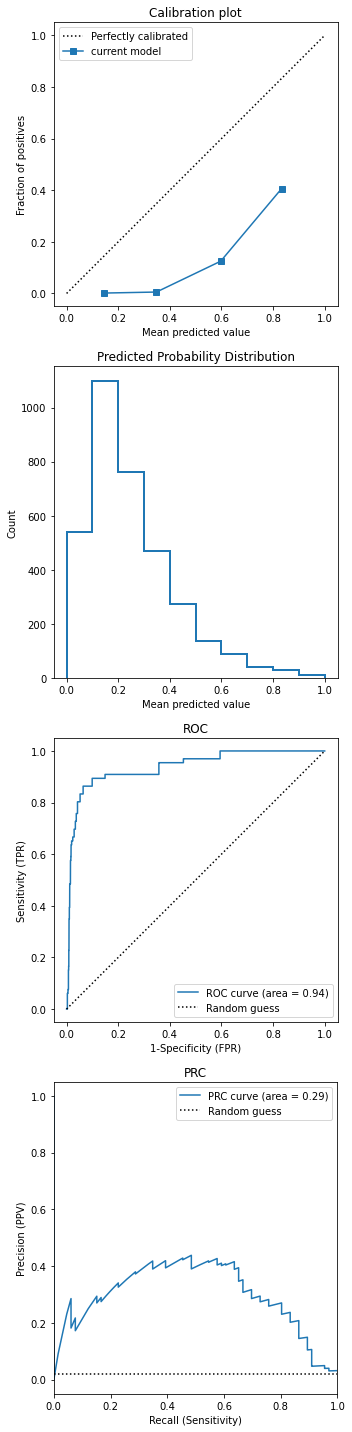

In [36]:
# Plot performance figures:
performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled, thres = 0.5)

In [37]:
# import matplotlib as plt
# plt.rcParams["figure.figsize"] = (12,7)
# ax = feature_imp_df_sort.plot('Feature', 'Score', kind='bar', color='c')
# ax.set_title("Feature Importance using Permutation method", fontsize = 14)
# ax.set_xlabel("features")


In [38]:
# # Train and calibrate model on entirety of the training set:

# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# from catboost import CatBoostClassifier
# cb_downsampled =  CatBoostClassifier(random_state = 1)
# cb_downsampled.fit(X_train_downsampled, y_train_downsampled, cat_features = np.array(get_cat_features(X_train_downsampled, 5)), verbose = False)
# pickle.dump(cb_downsampled, open('model_' +outcome + '_cb_downsampled.sav', 'wb'))

# # Create a corrected classifier. - Isotonic calibration
# cb_downsampled_iso = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='isotonic')
# cb_downsampled_iso.fit(X_train_downsampled, y_train_downsampled.ravel())

# pickle.dump(cb_downsampled_iso, open('model_' +outcome + '_cb_downsampled_iso.sav', 'wb'))

# cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cb_downsampled, cv=10, method='sigmoid')
# cb_downsampled_sigmoid.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cb_downsampled_sigmoid, open('model_' +outcome + '_cb_downsampled_sigmoid.sav', 'wb'))

# # loaded_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# # y_test_predict_proba_loaded_model = loaded_model.predict_proba(X_test)[:, 1]

# # # Bootstrap testset:
# # bs_testset_performance_df = pd.DataFrame()
# # for i in range(10):
# #     sample_indices = np.random.randint(len(X_test), size=len(X_test))
# #     bs_y_test = y_test[sample_indices]
# #     bs_X_test = X_test[sample_indices,:]
# #     bs_y_test_predict_proba_cb_downsampled_iso = cb_downsampled_iso.predict_proba(bs_X_test)[:, 1]
# #     bs_performance_metrics = performance(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
# #     bs_testset_performance_df = bs_testset_performance_df.append(bs_performance_metrics, ignore_index=True)


In [39]:
# # Bootstrap testset and spit prediction using calibrated model:
# import pickle
# import sklearn
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))

# bs_testset_pred_df = pd.DataFrame(list(zip(data_full['concatid'][test_index], test_index)),
#                                 columns=['concatid', 'index'])
# bs_testset_performance_iso_df = pd.DataFrame()
# for i in range(10):
#     sample_indices = np.random.randint(len(X_test), size=len(X_test))
#     bs_y_test = y_test[sample_indices]
#     bs_X_test = X_test[sample_indices,:]
#     bs_y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(bs_X_test)[:, 1]
#     bs_performance_metrics = performance_wo_figure(bs_y_test, bs_y_test_predict_proba_cb_downsampled_iso, thres = 0.5)
#     bs_testset_performance_iso_df = bs_testset_performance_iso_df.append(bs_performance_metrics, ignore_index=True)


In [40]:
# bs_testset_performance_iso_df

In [41]:
# iso_model = pickle.load(open('model_' +outcome + '_cb_downsampled_iso.sav', 'rb'))
# y_test_predict_proba_cb_downsampled_iso = iso_model.predict_proba(X_test)[:, 1]
# testset_iso_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled_iso)),
#                                 columns=['label', 'pred'])
# testset_iso_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_iso_' + outcome +'.csv', index=False)

In [42]:
# before_iso_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = before_iso_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_before_iso_' + outcome +'.csv', index=False)

In [43]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_sigmoid = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='sigmoid')
# cv_cb_downsampled_sigmoid.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_sigmoid, open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'wb'))


In [44]:
# cv_sigmoid_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_sigmoid.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_sigmoid_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_sigmoid_' + outcome +'.csv', index=False)

In [45]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic.fit(X_train, y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic, open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'wb'))
# cv_isotonic_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_' + outcome +'.csv', index=False)


In [46]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_db = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# X_train_downsampled = df_downsampled.drop(['label'],axis =1)
# y_train_downsampled = df_downsampled['label'].ravel()
# cv_cb_downsampled_isotonic_on_db.fit(X_train_downsampled, y_train_downsampled.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_db, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'wb'))
# cv_isotonic_model_on_db = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_db.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_db.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_db_' + outcome +'.csv', index=False)


In [47]:
# import pickle
# from sklearn import calibration
# cv_cb_downsampled = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# cv_cb_downsampled_isotonic_on_cv = sklearn.calibration.CalibratedClassifierCV(cv_cb_downsampled, cv=10, method='isotonic')
# cv_cb_downsampled_isotonic_on_cv.fit(cv_X_train, cv_y_train.ravel())
# pickle.dump(cv_cb_downsampled_isotonic_on_cv, open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'wb'))
# cv_isotonic_model_on_cv = pickle.load(open('model_' +outcome + '_cv_cb_downsampled_isotonic_on_cv.sav', 'rb'))
# y_test_predict_proba_cb_downsampled = cv_isotonic_model_on_cv.predict_proba(X_test)[:, 1]
# testset_pred_df = pd.DataFrame(list(zip(y_test, y_test_predict_proba_cb_downsampled)),
#                                 columns=['label', 'pred'])
# testset_pred_df.to_csv(load_dir+'/'+'pred_prob_testset_isotonic_on_cv_' + outcome +'.csv', index=False)


### Holdout testset feature space and sts_pred_prob filter:


In [48]:

# testset_df = data_full.iloc[test_index,:]
# testset_df.to_csv(load_dir+'/'+'testset_feature_df_' + outcome +'.csv', index=True)
# # load sts pred prob and filter only patients in the holdout test set:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# sts_pred_prob_df = pd.read_csv(load_dir+'/sts_pred_prob.csv')
# sts_pred_prob_df['concatid'] = sts_pred_prob_df['patid']+sts_pred_prob_df['recordid']
# sts_pred_prob_df_rm_dups = sts_pred_prob_df.drop_duplicates(subset='concatid', keep="last")
# sts_pred_prob_testset = sts_pred_prob_df_rm_dups.loc[sts_pred_prob_df_rm_dups['concatid'].isin(testset_df['concatid']),['concatid', 'predvent']]

# sts_pred_prob_testset.to_csv(load_dir+'/'+'sts_pred_prob_testset_' + outcome +'.csv', index=False)
# # # check to make sure the concatid in sts_pred_prob and in the testset are the same: 
# print(sorted(list(sts_pred_prob_testset['concatid'])) == sorted(list(testset_df['concatid'])))
# # # True

### Predicted Probability of Patients in Non-STS Set:

In [49]:
# load_dir = '/home/idies/workspace/Storage/hnguye78/persistent'+'/csv_files'
# feature_space_non_sts_patients = pd.read_csv(load_dir+'/non_sts_patients_feature_space.csv')
# X_non_sts = feature_space_non_sts_patients.drop(['label','Unnamed: 0', 'concatid'], axis = 1).values
# import pickle
# import sklearn
# loaded_model = pickle.load(open('model_' +outcome + '_cv_cb_downsampled.sav', 'rb'))
# y_non_sts_predict_proba = loaded_model.predict_proba(X_non_sts)[:, 1]

# prob_risk_non_sts_df = pd.DataFrame(list(zip(feature_space_non_sts_patients['concatid'], y_non_sts_predict_proba)),
#                                 columns=['concatid', 'predicted_prob'])
# prob_risk_non_sts_df.to_csv(load_dir+'/'+'pred_prob_non_sts_patients_df_' + outcome +'.csv', index=False)
# # # check to see that the non_sts set does not overlap with the testset concatid 
# # set((prob_risk_non_sts_df['concatid'])).intersection((set(testset_df['concatid'])))
# # # no overlap